# Apply Bond to automatic PSAP: 

In this script I will collect, clean and organise the raw data files for the new PSAP stationed at Zeppelin. The "New PSAP" as it is known operates using an automatic filter change. Whereby the filter is changed when the tranmission decreases by a certain amount. As the aerosol concentrations are lower in the summer, the samping times/duration the filter is on is greater.

The data is sorted via the separate filters, the filters are then inspected and the "bad filters" are removed. 

Finally, a rolling averge is applied for 3 neigbouring points (set on the middle point). The Bond correction is done with a time step (set at 15 minutes). The absorption coefficent is calculated by loking at the change in the transmission.

Single wavelength PSAP operating at 525 nm:
- Filter area = 8.04e-6
- Filterconstant = 2
- Timeresolution of instrument output to raw data file is 1minute

In [2]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\NEW_PSAP_Bond')
import NEW_PSAP_bond_functions as fu_NewPSAP

%load_ext autoreload
%autoreload 2

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
out_path_plots = "C:\\Users\\DominicHeslinRees\\Pictures\\black_carbon\\new_PSAP\\"
out_path_datafiles = "C:\\Users\\DominicHeslinRees\\Documents\\Data\\processed_data\\new_PSAP\\"
savepath = r'C:\Users\DominicHeslinRees\Documents\Analysis\absorption\New_PSAP'

In [3]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy==1.22.4


In [4]:
RAW_NEW_PSAP_2012_2014 = fu_NewPSAP.append_soot_raw("C:\\Users\\DominicHeslinRees\\Documents\\Data\\PSAP\\PSAP_RAW\\RAW_2006-2014\\",
                                         np.arange(2012,2015,1), 
                                         ['Date','Time','Io','I','qobs','Lnr','Qset','InTime','Ia','Ib','FChanged','ChangeF','check1','check2'],
                                         'sootrawNYA')

year: 2012
length: 43
year: 2013
length: 375
year: 2014
length: 323


In [5]:
RAW_NEW_PSAP_2015_2016 = fu_NewPSAP.append_soot_raw("C:\\Users\\DominicHeslinRees\\Documents\\Data\\PSAP\\PSAP_RAW\\RAW_2015-2016\\", 
                                         np.arange(2015,2017,1), 
                                         ['Date','Time','Io','I','qobs','Lnr','Qset','InTime','Ia','Ib','FChanged','ChangeF','check1','check2'],
                                         'sootrawNYA')

year: 2015
length: 260
year: 2016
length: 282


In [6]:
RAW_NEW_PSAP = fu_NewPSAP.concat_two_dfs(RAW_NEW_PSAP_2012_2014, RAW_NEW_PSAP_2015_2016)

In [33]:
RAW_NEW_PSAP.head(2)

,Io,I,qobs,Lnr,Qset,InTime,Ia,Ib,FChanged,ChangeF,check1,check2,deltaT_forward,deltaT_behind,diff_I,diff_Io,FChanged_diff,Filter_cum
2012-11-19 10:58:08,4.91116,4.58463,0.499338,-inf,0.5,0,1.07122,0.0,1,True,246,206795000,0.0,1.0,NaN,NaN,1,1
2012-11-19 10:59:08,4.91215,4.58550,0.499562,-inf,0.5,0,1.07124,0.0,1,True,128,875,1.0,1.0,0.00087,0.00099,1,2


In [37]:
RAW_NEW_PSAP.index.to_series().diff().mean()

Timedelta('0 days 00:01:19.223874974')

In [7]:
RAW_NEW_PSAP = fu_NewPSAP.remove_meaningless_values(RAW_NEW_PSAP)
fu_NewPSAP.save_df(RAW_NEW_PSAP, name='RAW_NEW_PSAP', path=savepath)

Save to: C:\Users\DominicHeslinRees\Documents\Analysis\absorption\New_PSAP


In [8]:
RAW_NEW_PSAP = fu_NewPSAP.add_filters(RAW_NEW_PSAP)

0.9976973926400357 minutes
0.0006057470020564986
0.0004265271267010571
Maximum number of filters: 908


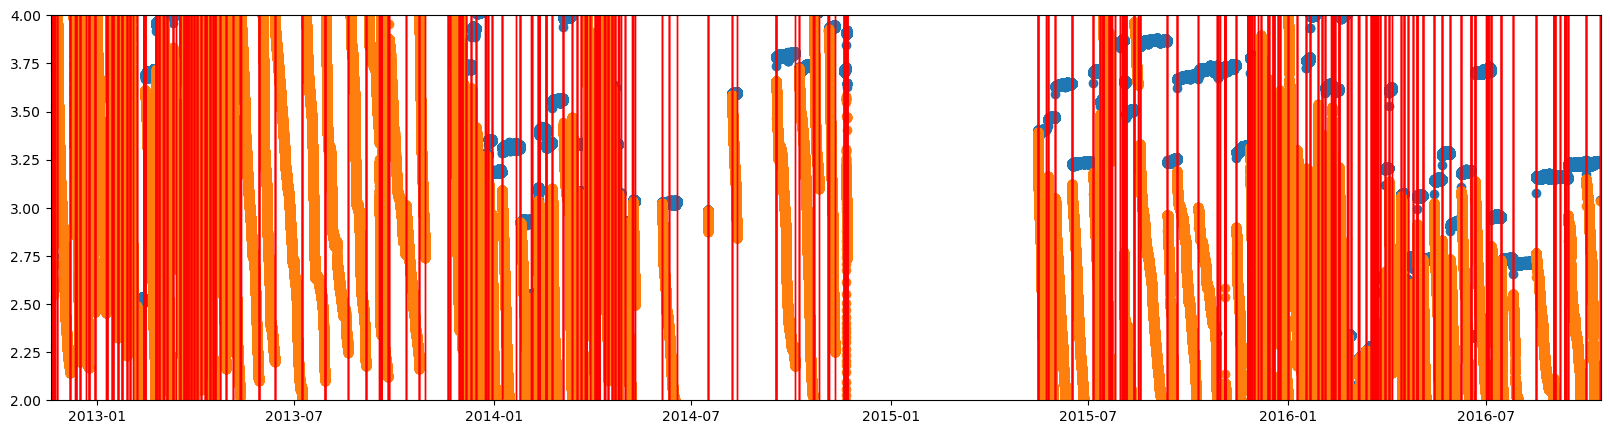

In [9]:
fig = fu_NewPSAP.make_plot(RAW_NEW_PSAP) 

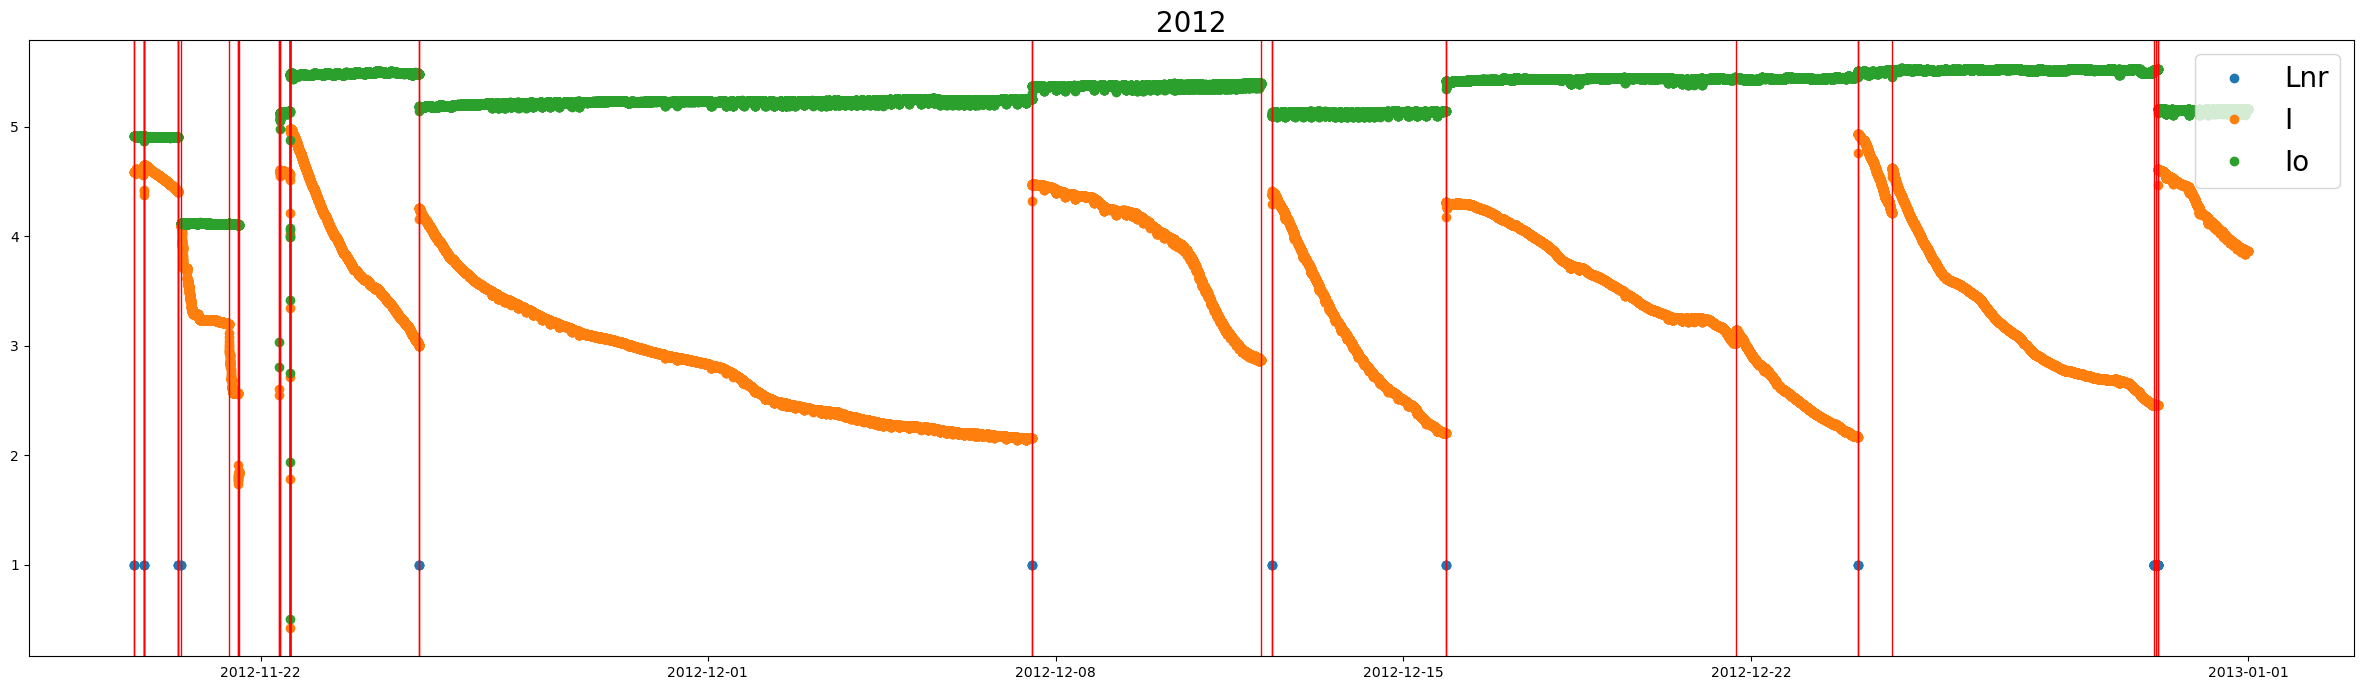

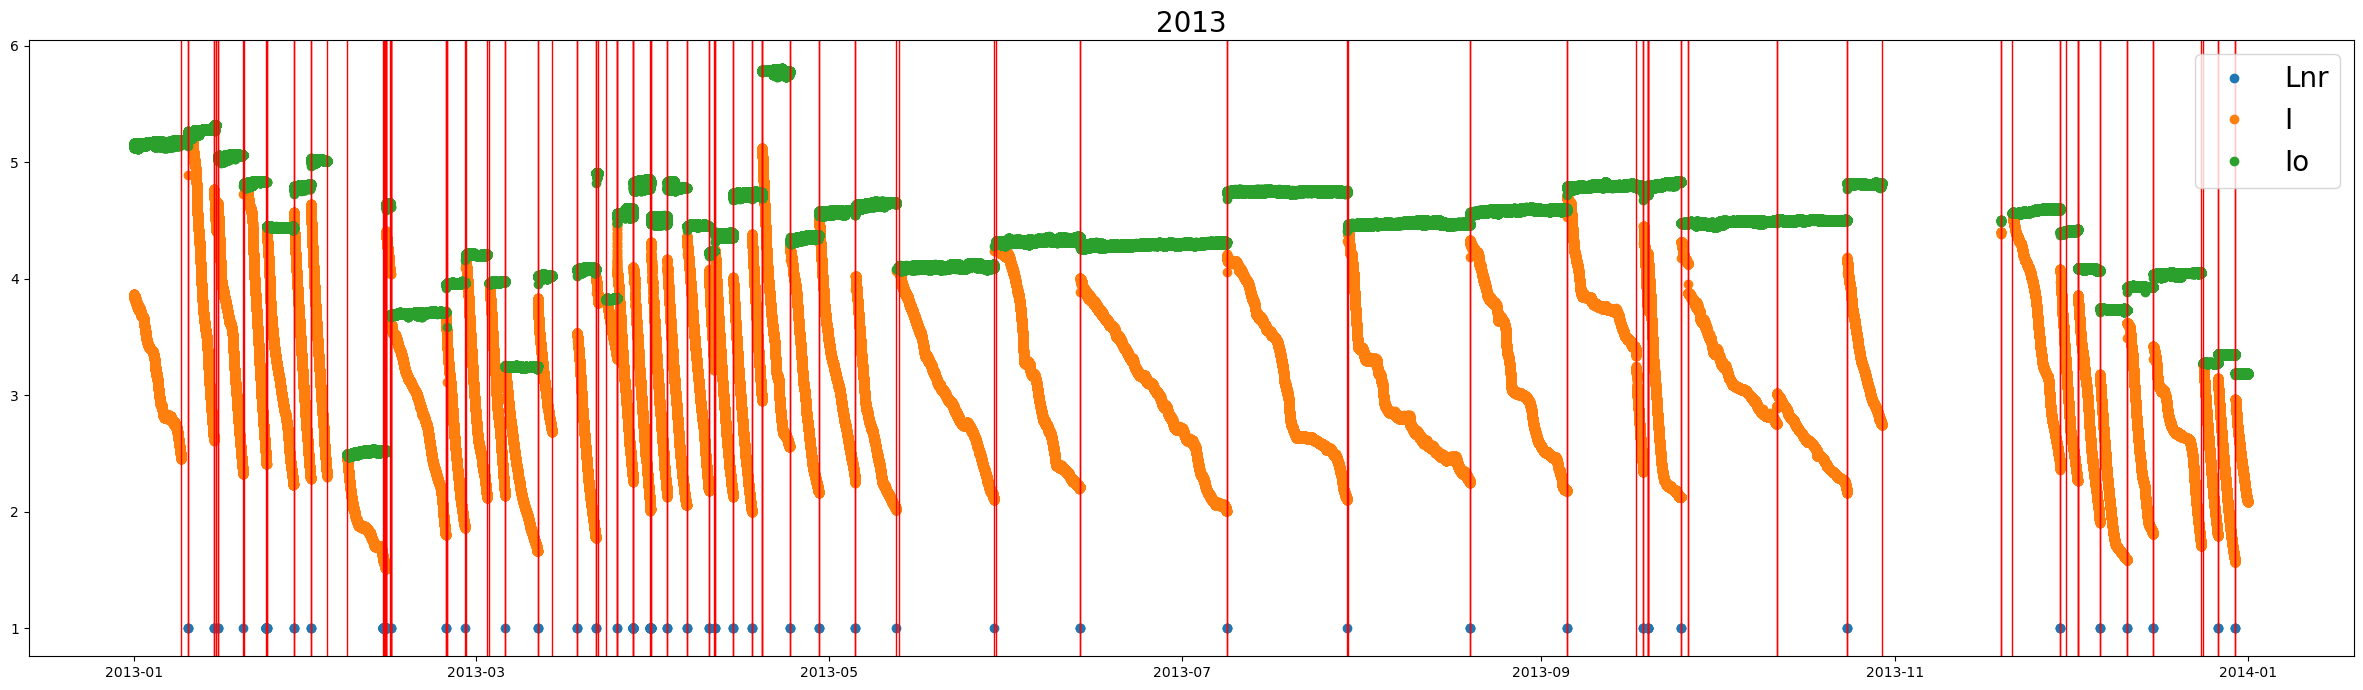

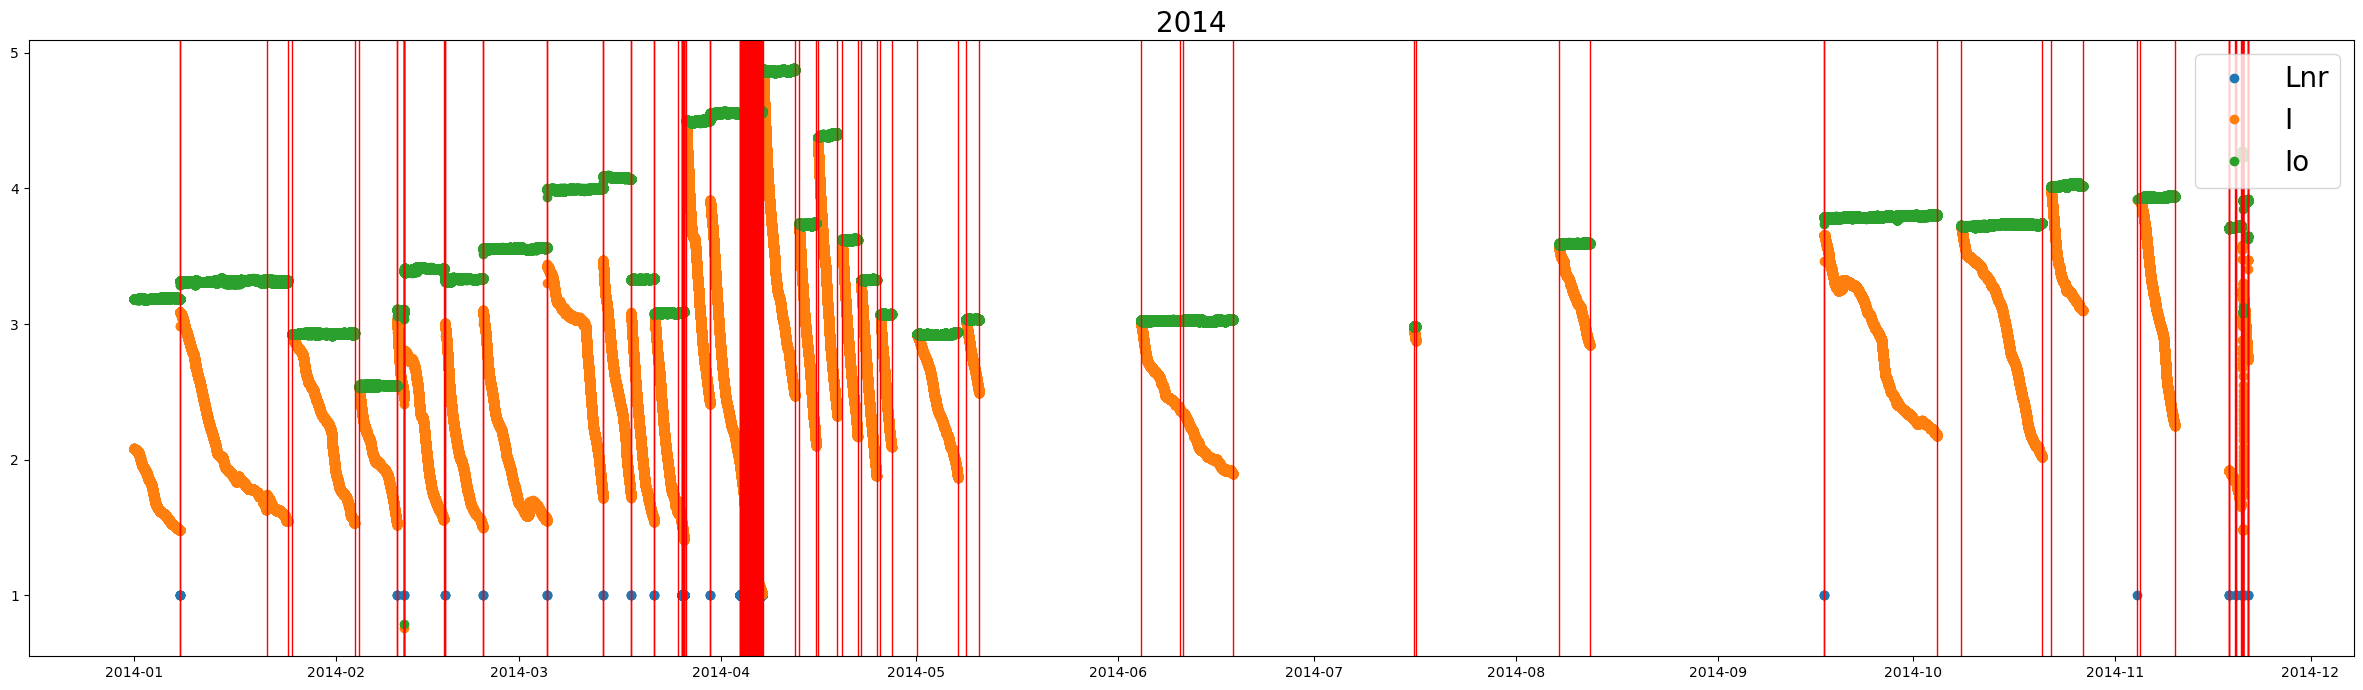

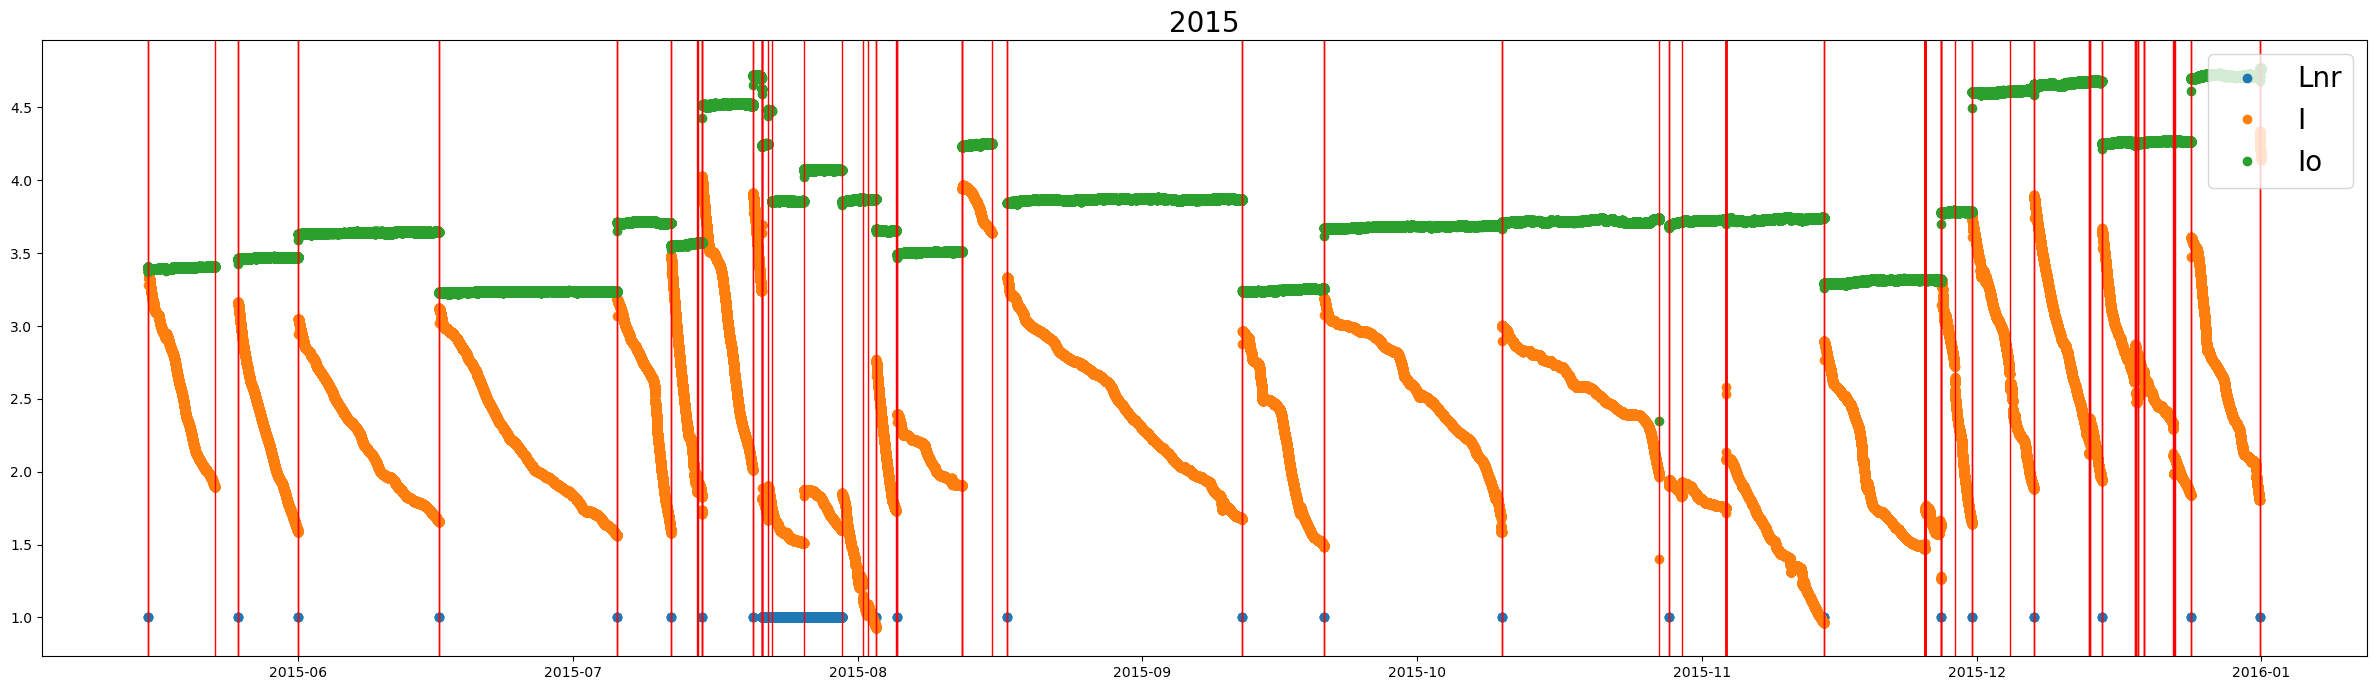

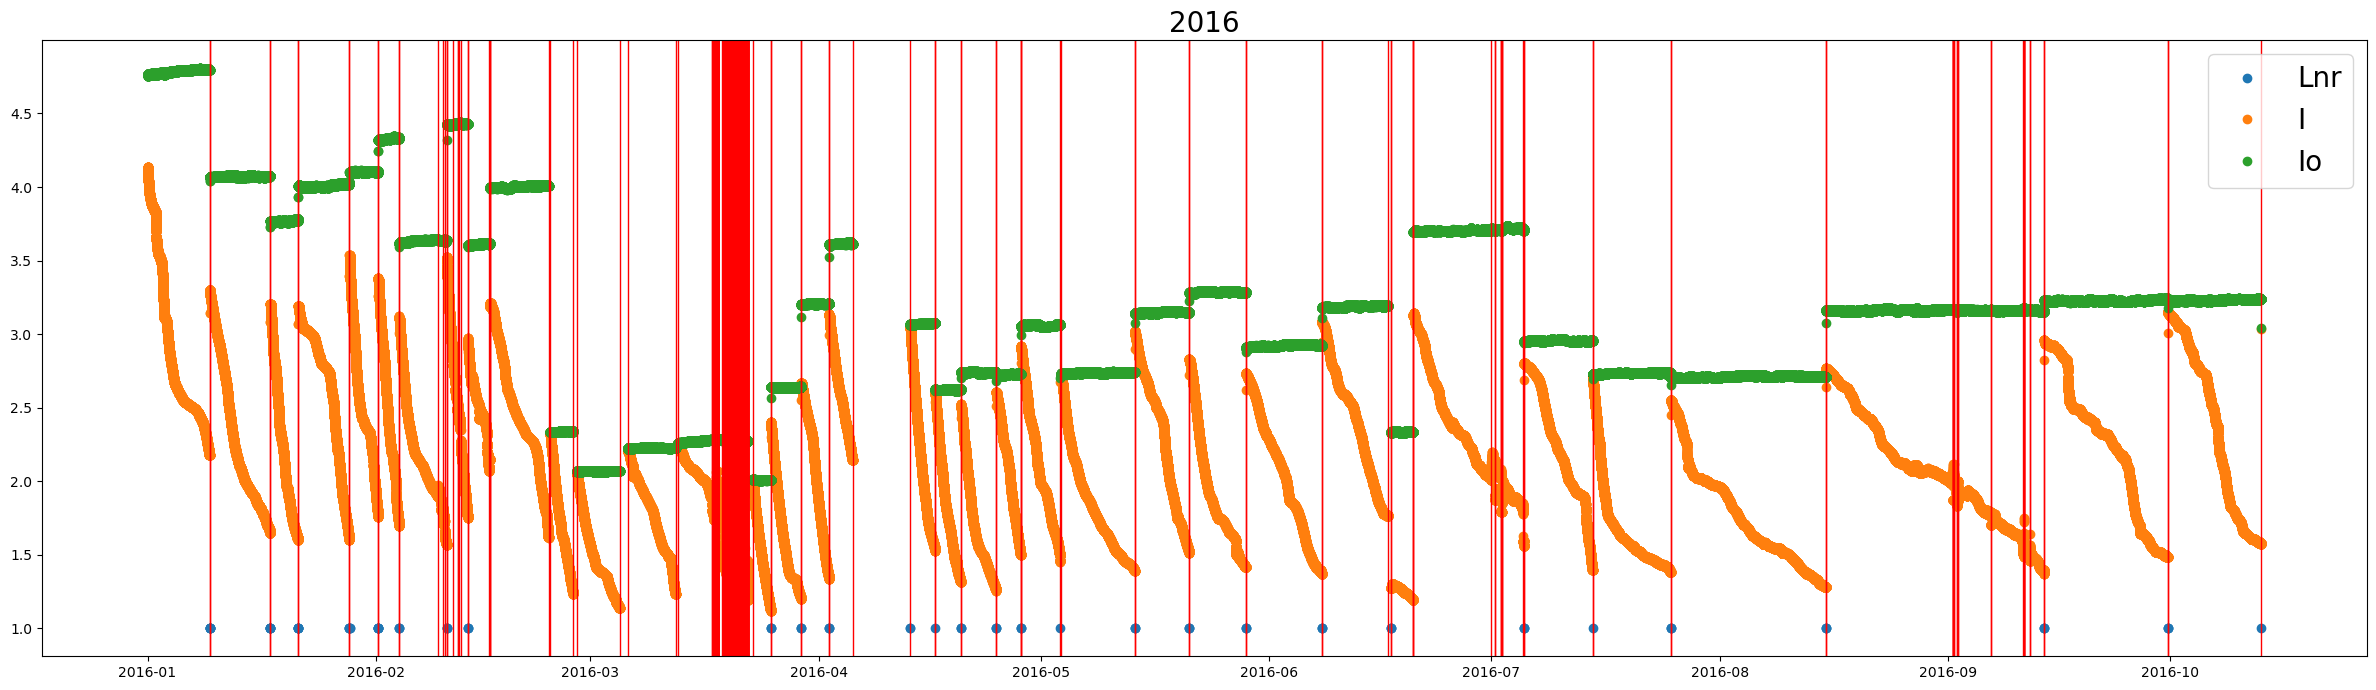

In [10]:
fu_NewPSAP.for_each_year(RAW_NEW_PSAP, np.arange(2012,2017,1))

In [11]:
dfs = fu_NewPSAP.create_dfs_for_filters(RAW_NEW_PSAP)

In [12]:
dfs_ends_removed = fu_NewPSAP.remove_ends_for_all(dfs)
dfs_minimum_size = fu_NewPSAP.minimum_size_of_dfs(dfs_ends_removed)

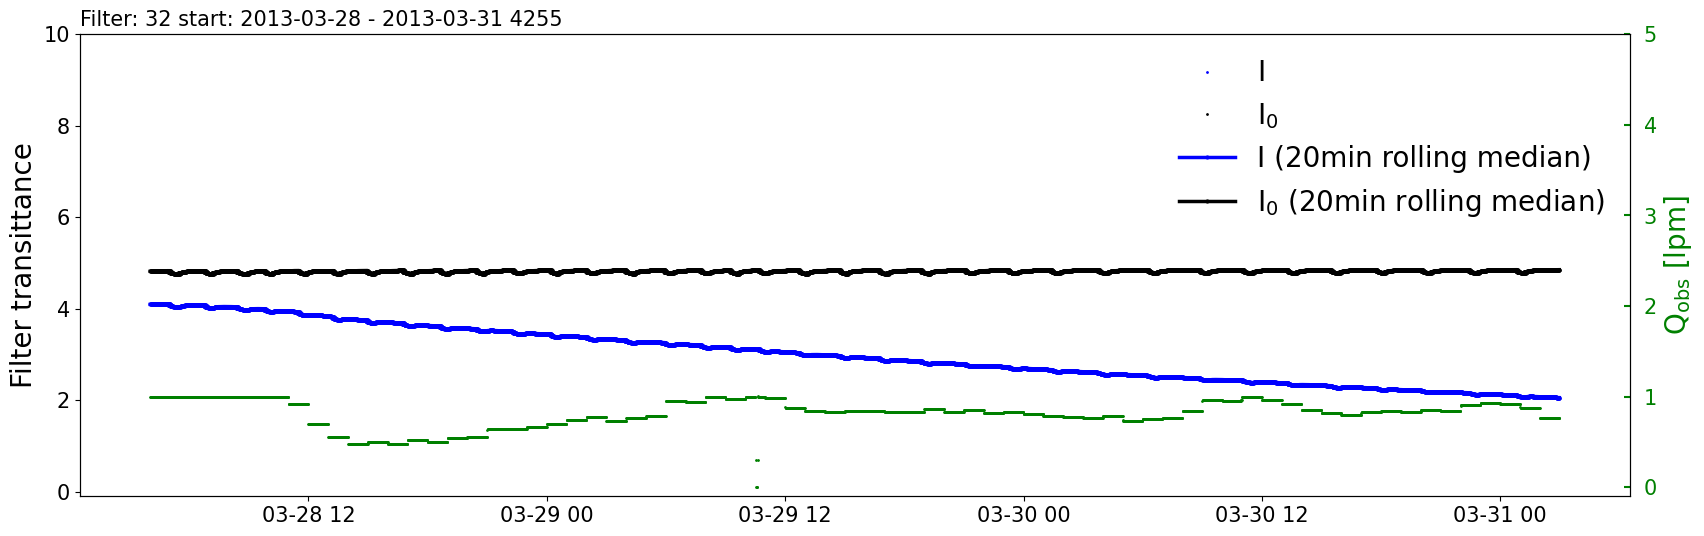

saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\filter_32.jpeg


In [13]:
fig = fu_NewPSAP.plot_each_filter_for_dfs(dfs_minimum_size, start=31, end=32, rolling_median=True, ms=1)
fu_NewPSAP.save_plot(fig, name='filter_32')

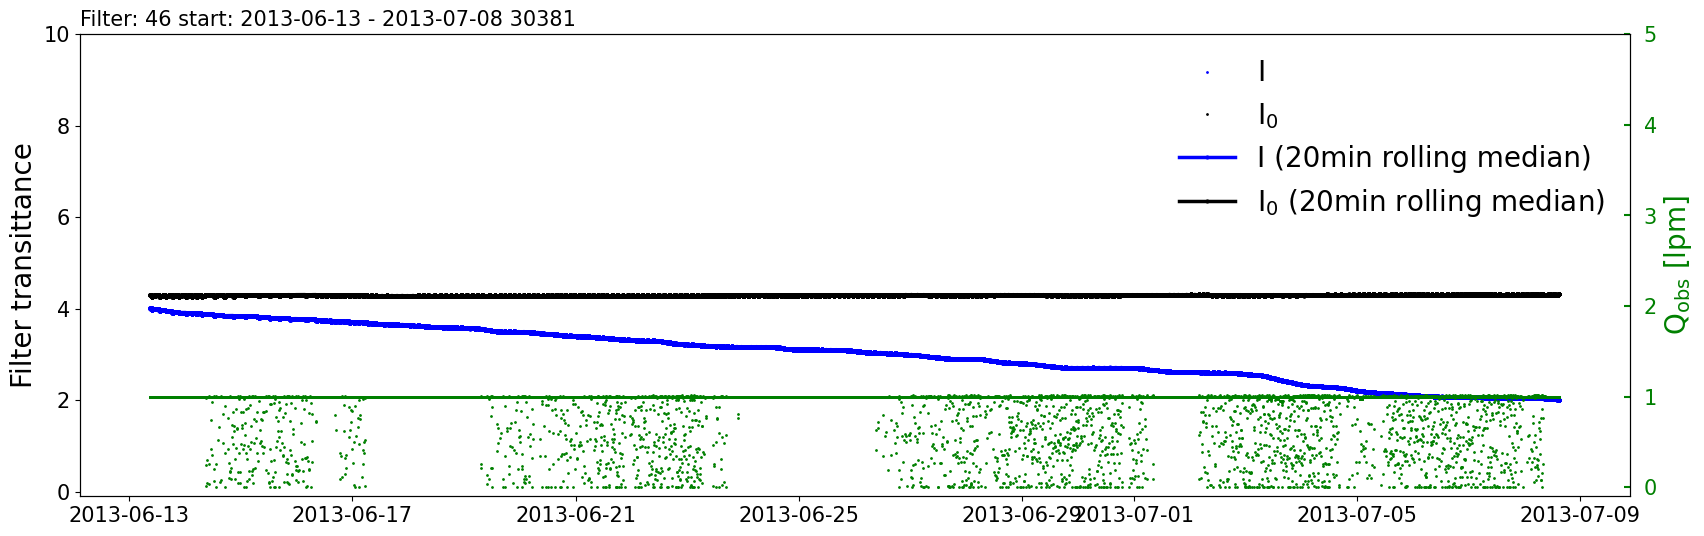

saved as: C:\Users\DominicHeslinRees\Pictures\black_carbon\final_plots\\filter_45.jpeg


In [14]:
fig = fu_NewPSAP.plot_each_filter_for_dfs(dfs_minimum_size, start=45, end=46, rolling_median=True, ms=1)
fu_NewPSAP.save_plot(fig, name='filter_45')

In [16]:
#fu_NewPSAP.plot_each_filter_for_dfs(dfs_minimum_size, rolling_median=True, ms=1)

In [17]:
fu_NewPSAP.create_info_table(dfs_minimum_size)

,Size of filter
Datetime,
2012-11-19 15:54:15,974
2012-11-20 09:37:59,1390
2012-11-22 14:14:59,3728
2012-11-25 04:37:59,17706
2012-12-07 12:37:17,6643
...,...
2016-09-06 19:02:19,6118
2016-09-11 05:03:19,1218
2016-09-12 01:24:19,2796


# Bond (1999): 

### Operation 

The simplest calculation of absorption coefficient, in units of m$^{-1}$, is given by the equation below for any fillter-based method:

\begin{equation}
\sigma_{\mathrm{ap}}^{\prime}=\frac{A}{V} \ln \left[\frac{I_{0}}{I}\right]
\end{equation}

The value actually reported by the PSAP (sPSAP ) includes an empirical calibration that accounts for both of these effects:

\begin{equation}
\sigma_{\mathrm{PSAP}}=\frac{\sigma_{\mathrm{ap}}^{\prime}}{2(0.5398 \tau+0.355)}
\end{equation}

where $\tau$ is the filter transmission ($\tau$ = 1 for an unloaded filter; this value is reset by the user after installation of each new filter).

### Spot correction

\begin{equation}
F_{spot} = \frac{\sigma_{calib}}{\sigma_{PSAP}} = (\frac{D_{meas}}{D_{calib}})^{2}
\end{equation}

### Flow calibaration

$F_{flow} = $ for this instrument there no flow correction factor used

\begin{equation}
\sigma_{a d j}=\sigma_{\mathrm{PSAP}} F_{f} \operatorname{low} F_{s p o t}
\end{equation}

### PSAP Correction 

The adjustment to and uncertaintiesin the PSAP are summarized below:

\begin{equation}
\sigma_{ap} = \frac{\sigma_{adj} - K_{1}\sigma_{sp} + \epsilon_{slope} + \epsilon_{noise}}{K_{2}}
\end{equation}

### Instrument Precision

where K1 = 0.02 ± 0.02, K2 = 1.22 ± 0.20, sadj is the reported value after the flow and spot size corrections, $\sigma_{sp}$ is the scattering coefficient at 550nm, and $\epsilon_{slope}$ + $\epsilon_{noise}$ are defined in Equations (7) and (8) in Bond (1999). $\epsilon_{slope}$ = 0.06$\sigma_{ap, meas}$ and $\epsilon_{noise}$ = 0.18$\sqrt{\tau_{0}/\tau}$, $\tau$ is the averaging time and $\tau_{0}$ = 24 min.

applied after flow and spot size corrections - $\sigma_{sp}$ is the scattering coefficient at 550 nm

The formula for the Bond correction has been simplifed to the follwoing in other studies: 
<br>
$\sigma_{(t)} = A/Vln(I(t-\Delta t)/I(t)) \cdot 1/1.317 \cdot \tau + 0.866 - 0.016 \cdot \sigma_{sp}$

In [18]:
df_concat = fu_NewPSAP.concat_dfs(dfs_minimum_size)

In [19]:
df_averaging_times = fu_NewPSAP.bond_correction_averaging(dfs_minimum_size)

1.599753570059363 mm
Diameter: 3.199507140118726 mm
Bond correction 

Avergaing over the time step: 15 mins
Area: 8.04e-06
Running median: 20
Time step: 15


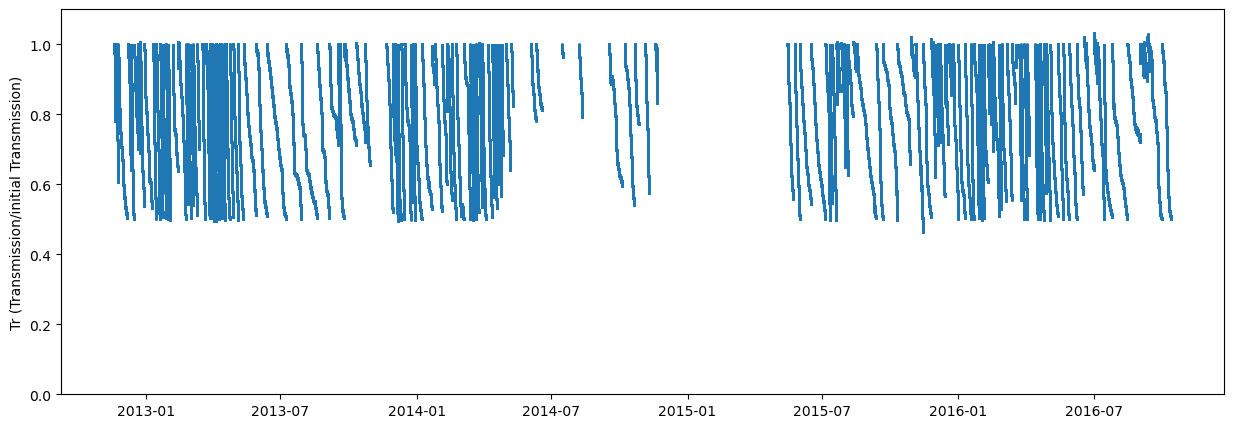

In [20]:
fig = fu_NewPSAP.plot_transmission(df_averaging_times)

In [21]:
df_averaging_times = fu_NewPSAP.select_for_transmission(df_averaging_times)

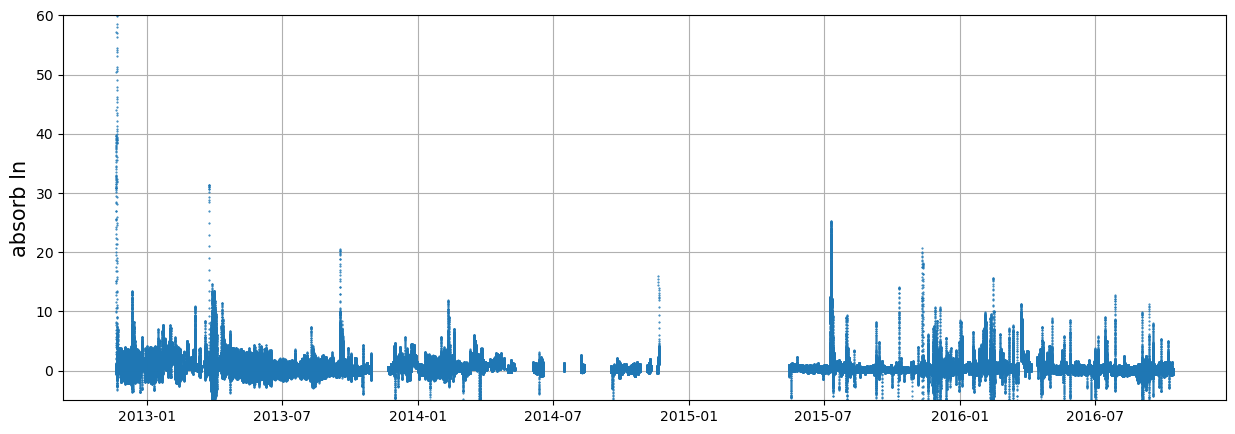

In [22]:
fig = fu_NewPSAP.inital_plot(df_averaging_times, var='abs_ln', y_lim=60)

In [23]:
df_averaging_times = fu_NewPSAP.remove_datetimes_slice(df_averaging_times, 
                                                       dt_min = '2013-10-29 00:00:01', 
                                                       dt_max='2013-11-19 08:46:49')

1481892
1480784


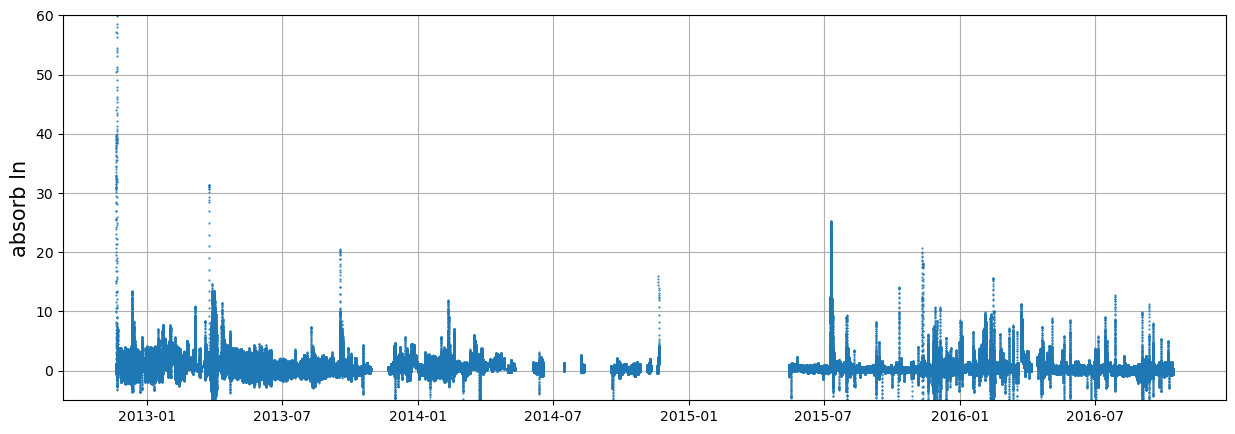

In [24]:
fig = fu_NewPSAP.inital_plot(df_averaging_times, var='abs_ln', y_lim=60)

In [25]:
df_averaging_times = fu_NewPSAP.remove_extreme_values(df_averaging_times, var='abs_ln')

Mean :0.5868005419447905
Mean (extremes removed) :0.5326076603693694


In [26]:
df_abs_without_scat = df_averaging_times.copy()

In [27]:
df_scat = fu_NewPSAP.load_df("C:\\Users\\DominicHeslinRees\\Documents\\Analysis\\Neph", extrapath=None, 
                   filename='df_scat_TSI_ecotech_Mie_noLOD', formatdata=".dat", index_col=0)

loading: C:\Users\DominicHeslinRees\Documents\Analysis\Neph\df_scat_TSI_ecotech_Mie_noLOD.dat


In [28]:
df_abs_scat = fu_NewPSAP.merge_with_tolerance(df_abs_without_scat, df_scat)
df_abs_neph = fu_NewPSAP.remove_neph(df_abs_scat) 

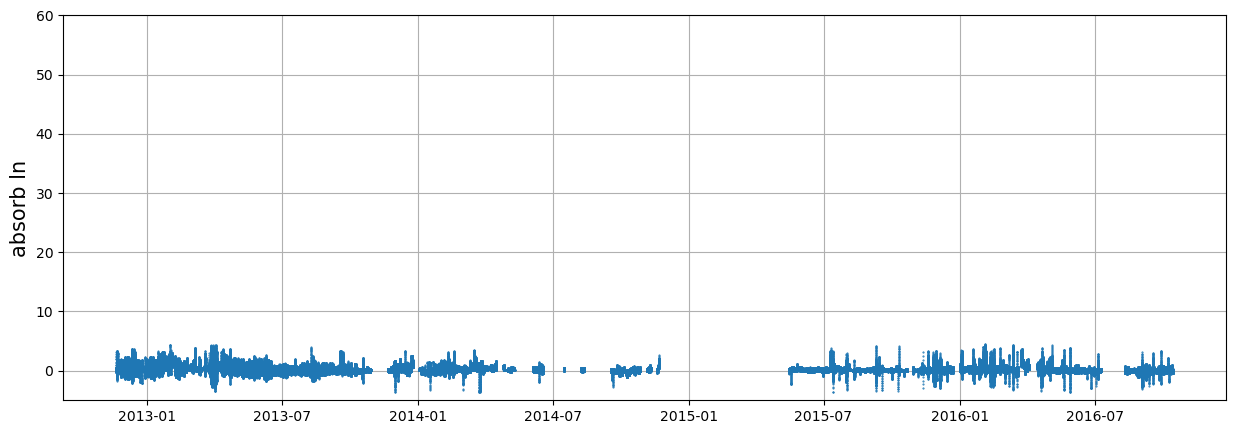

In [29]:
fig = fu_NewPSAP.inital_plot(df_abs_neph, var='abs_neph')

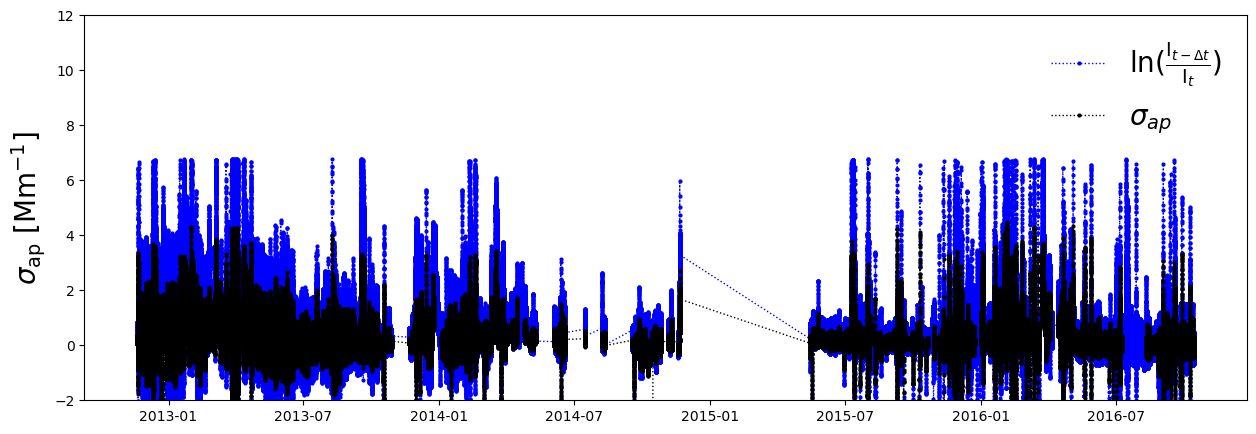

In [30]:
fig = fu_NewPSAP.plot_corrected_and_uncorrected(df_abs_neph)

2013-03-05 01:00:00


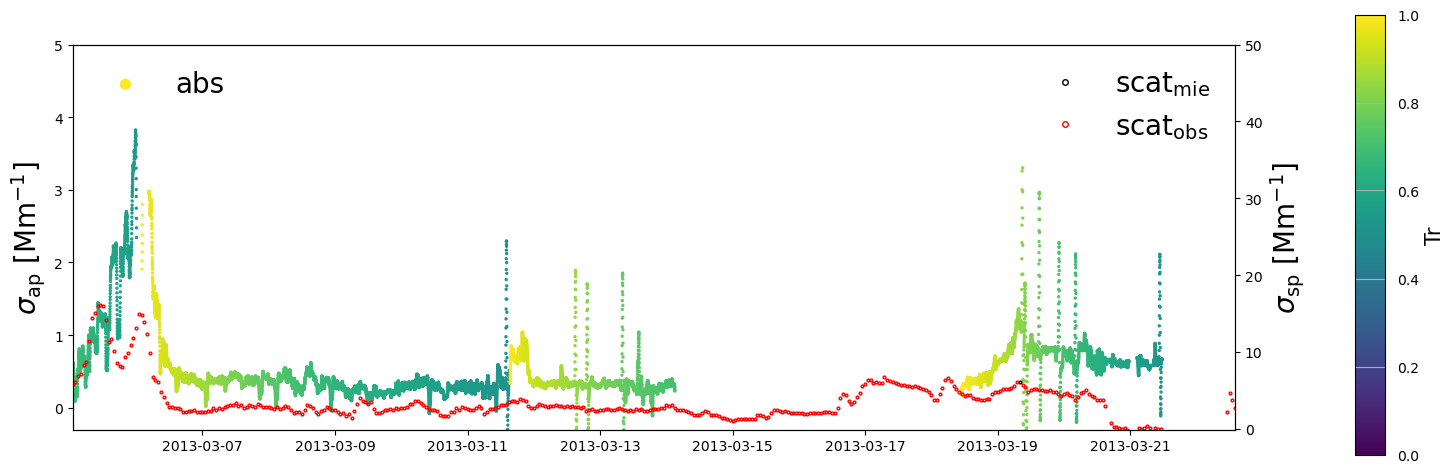

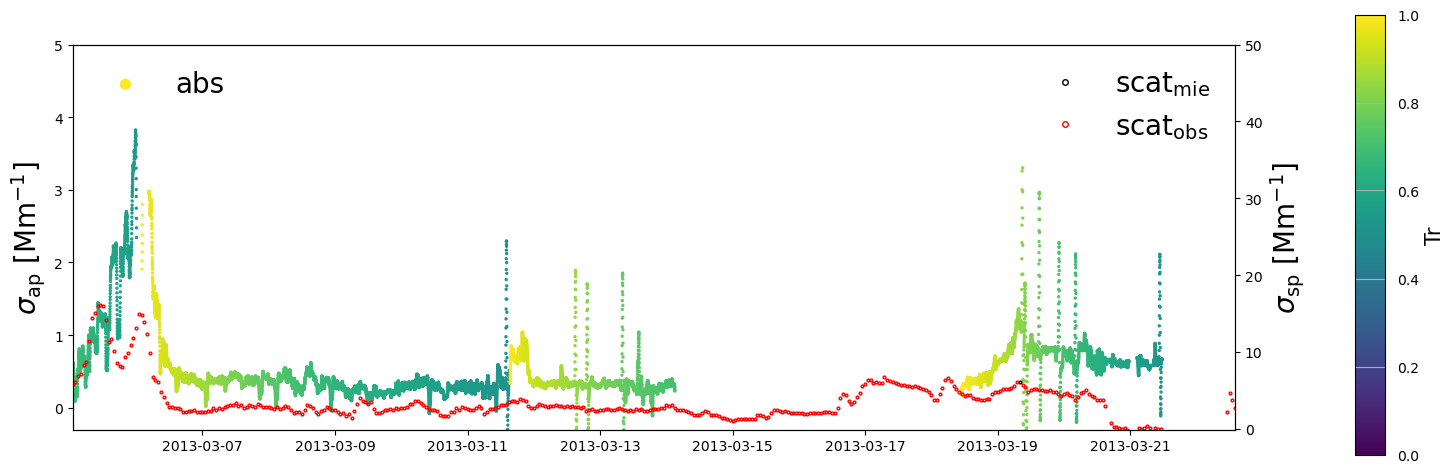

In [31]:
fu_NewPSAP.scat_abs(df_abs_neph, df_scat, abs_var='abs_neph', ms=2, 
         startdatetime='2013-03-05 01:00:00', enddatetime='2013-03-22 14:00:00')

In [32]:
df_abs_neph525 = df_abs_neph.copy()
df_abs_neph525['abs525'] = df_abs_neph['abs_neph']

fu_NewPSAP.save_df(df_abs_neph525, 'New_PSAP', r'C:\Users\DominicHeslinRees\Documents\Analysis\absorption\New_PSAP', 
                   float_format=None)

Save to: C:\Users\DominicHeslinRees\Documents\Analysis\absorption\New_PSAP
